# Описание задачи

В наборе данных приведена информация о красных и белых винах португальской винодельни "Vinho Verde". Нам доступны тольно физико-химические параметры и оценки качества вина. 
Этот набор данных можно использовать для задачи классификации. Классы упорядочены и не сбалансированы. Автор данного датасета случайным образом удалил несколько значений переменных.

Признаки:
1. type - тип вина (красный или белый)
2. fixed acidity - фиксированная кислотность
3. volatile acidity - содержание летучих кислот
4. citric acid - содержание лимонной кислоты
5. residual sugar - остаточный сахар
6. chlorides - содержание хлоридов
7. free sulfur dioxide - свободный диоксид серы
8. total sulfur dioxide - общее содержание диоксида серы
9. density - плотность
10. pH - мера кислотности
11. sulphates - содержание сульфатов
12. alcohol - содержание алкоголя
13. quality - качество (по десятибалльной шкале)

# Чтение данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns
import sklearn

In [2]:
url = "https://raw.githubusercontent.com/SamvelNalchajyan/MachineLearning21/main/winequalityN.csv"
data_raw = pd.read_csv(url)
data_raw.shape

(6497, 13)

In [3]:
data_raw.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data_raw.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
data_raw.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [6]:
data_raw.index

RangeIndex(start=0, stop=6497, step=1)

In [7]:
data_raw['type'].dtype
# Столбец "type" содержит категориальные значения. Пока оно имеет тип 'Object'.
# Заменим тип на специальный, предназначенный для хранения категориальных значений:

dtype('O')

In [8]:
data_raw['type'] = data_raw['type'].astype('category')

In [9]:
data_raw['type'].dtype

CategoricalDtype(categories=['red', 'white'], ordered=False)

# Борьба с выбросами 

Для обнаружения выбросов воспользуемся только физико-химическими параметрамы

In [10]:
data_raw['fixed acidity'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     4.943
0.010     5.100
0.050     5.700
0.100     6.000
0.500     7.000
0.900     8.800
0.950     9.800
0.990    12.000
0.995    12.700
Name: fixed acidity, dtype: float64

In [11]:
data_raw['volatile acidity'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.115
0.010    0.120
0.050    0.160
0.100    0.180
0.500    0.290
0.900    0.590
0.950    0.670
0.990    0.880
0.995    0.965
Name: volatile acidity, dtype: float64

In [12]:
data_raw['citric acid'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.00
0.010    0.00
0.050    0.05
0.100    0.14
0.500    0.31
0.900    0.49
0.950    0.56
0.990    0.74
0.995    0.74
Name: citric acid, dtype: float64

In [13]:
data_raw['residual sugar'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.8
0.010     0.9
0.050     1.2
0.100     1.3
0.500     3.0
0.900    13.0
0.950    15.0
0.990    18.2
0.995    19.4
Name: residual sugar, dtype: float64

In [14]:
data_raw['chlorides'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.01847
0.010    0.02100
0.050    0.02800
0.100    0.03100
0.500    0.04700
0.900    0.08600
0.950    0.10200
0.990    0.18624
0.995    0.24206
Name: chlorides, dtype: float64

In [15]:
data_raw['free sulfur dioxide'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     3.0
0.010     4.0
0.050     6.0
0.100     9.0
0.500    29.0
0.900    54.0
0.950    61.0
0.990    77.0
0.995    86.0
Name: free sulfur dioxide, dtype: float64

In [16]:
data_raw['total sulfur dioxide'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      9.0
0.010     11.0
0.050     19.0
0.100     30.0
0.500    118.0
0.900    188.0
0.950    206.0
0.990    238.0
0.995    247.0
Name: total sulfur dioxide, dtype: float64

In [17]:
data_raw['density'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.988620
0.010    0.988920
0.050    0.989900
0.100    0.990670
0.500    0.994890
0.900    0.998400
0.950    0.999392
0.990    1.000600
0.995    1.001400
Name: density, dtype: float64

In [18]:
data_raw['pH'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    2.86
0.010    2.89
0.050    2.97
0.100    3.02
0.500    3.21
0.900    3.42
0.950    3.50
0.990    3.64
0.995    3.70
Name: pH, dtype: float64

In [19]:
data_raw['sulphates'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.2800
0.010    0.3000
0.050    0.3500
0.100    0.3700
0.500    0.5100
0.900    0.7200
0.950    0.7900
0.990    0.9900
0.995    1.1254
Name: sulphates, dtype: float64

In [20]:
data_raw['alcohol'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     8.6
0.010     8.7
0.050     9.0
0.100     9.1
0.500    10.3
0.900    12.3
0.950    12.7
0.990    13.4
0.995    13.6
Name: alcohol, dtype: float64

In [21]:
rows_to_drop = data_raw[
    (data_raw['fixed acidity'] < data_raw['fixed acidity'].quantile(0.005)) | (data_raw['fixed acidity'] > data_raw['fixed acidity'].quantile(0.995)) | 
    (data_raw['volatile acidity'] < data_raw['volatile acidity'].quantile(0.005)) | (data_raw['volatile acidity'] > data_raw['volatile acidity'].quantile(0.995)) | 
    (data_raw['citric acid'] < data_raw['citric acid'].quantile(0.005)) | (data_raw['citric acid'] > data_raw['citric acid'].quantile(0.995)) | 
    (data_raw['residual sugar'] < data_raw['residual sugar'].quantile(0.005)) | (data_raw['residual sugar'] > data_raw['residual sugar'].quantile(0.995)) | 
    (data_raw['chlorides'] < data_raw['chlorides'].quantile(0.005)) | (data_raw['chlorides'] > data_raw['chlorides'].quantile(0.995)) | 
    (data_raw['free sulfur dioxide'] < data_raw['free sulfur dioxide'].quantile(0.005)) | (data_raw['free sulfur dioxide'] > data_raw['free sulfur dioxide'].quantile(0.995)) | 
    (data_raw['total sulfur dioxide'] < data_raw['total sulfur dioxide'].quantile(0.005)) | (data_raw['total sulfur dioxide'] > data_raw['total sulfur dioxide'].quantile(0.995)) | 
    (data_raw['density'] < data_raw['density'].quantile(0.005)) | (data_raw['density'] > data_raw['density'].quantile(0.995)) | 
    (data_raw['pH'] < data_raw['pH'].quantile(0.005)) | (data_raw['pH'] > data_raw['pH'].quantile(0.995)) | 
    (data_raw['sulphates'] < data_raw['sulphates'].quantile(0.005)) | (data_raw['sulphates'] > data_raw['sulphates'].quantile(0.995)) | 
    (data_raw['alcohol'] < data_raw['alcohol'].quantile(0.005)) | (data_raw['alcohol'] > data_raw['alcohol'].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(6010, 13)

# Визуализация данных и вычисление основных характеристик

In [22]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6000.000000,6003.000000,6007.000000,6008.000000,6008.000000,6010.000000,6010.000000,6010.000000,6001.000000,6006.000000,6010.000000,6010.000000
mean,7.193642,0.335757,0.315597,5.419724,0.054350,30.356572,116.067304,0.994671,3.218882,0.526980,10.467870,5.822463
std,1.185265,0.155858,0.137633,4.590567,0.025698,16.554108,55.073220,0.002835,0.152830,0.132887,1.152919,0.857996
min,5.000000,0.115000,0.000000,0.800000,0.019000,3.000000,9.000000,0.988620,2.860000,0.280000,8.600000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,79.250000,0.992380,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,119.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,7.600000,0.400000,0.390000,8.100000,0.064000,41.000000,156.000000,0.996900,3.320000,0.600000,11.300000,6.000000
max,12.700000,0.965000,0.740000,19.400000,0.241000,86.000000,247.000000,1.001400,3.700000,1.120000,13.600000,9.000000


In [23]:
data.describe(include=['category'])

,type
count,6010
unique,2
top,white
freq,4576


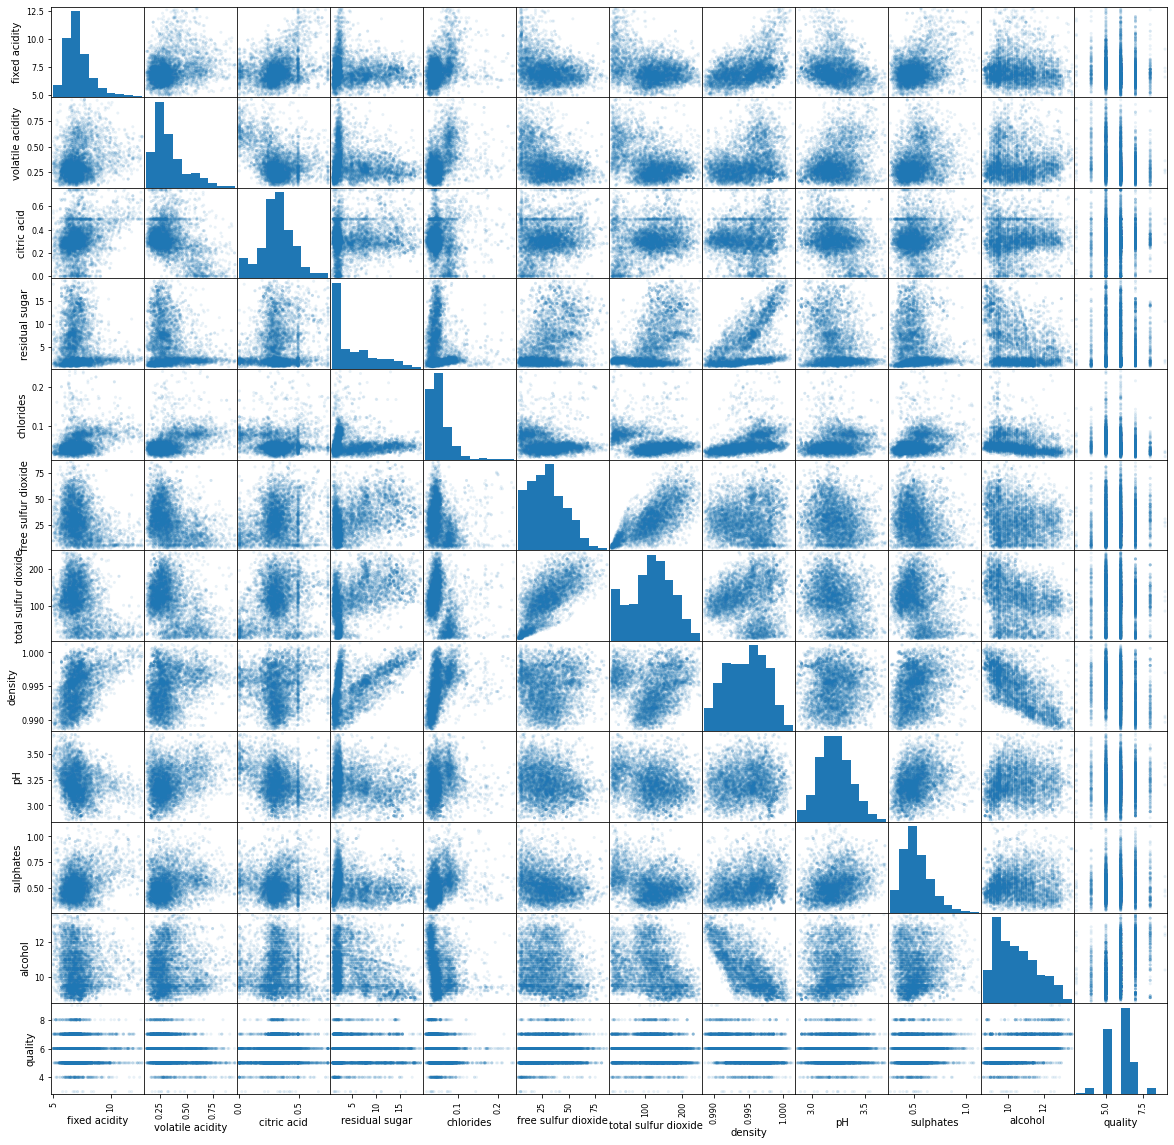

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = 0.1, figsize = (20, 20))
pass

In [25]:
corr_mat = data.corr()
corr_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.231865,0.291109,-0.134532,0.343356,-0.288568,-0.336075,0.438595,-0.210296,0.298839,-0.070422,-0.073428
volatile acidity,0.231865,1.000000,-0.416406,-0.214773,0.447943,-0.366524,-0.431306,0.281614,0.277204,0.226324,-0.053859,-0.256079
citric acid,0.291109,-0.416406,1.000000,0.137599,-0.069129,0.164252,0.219622,0.053757,-0.310921,0.027945,0.014089,0.091881
residual sugar,-0.134532,-0.214773,0.137599,1.000000,-0.155507,0.443391,0.508931,0.538986,-0.274251,-0.191363,-0.374881,-0.037153
chlorides,0.343356,0.447943,-0.069129,-0.155507,1.000000,-0.227889,-0.332335,0.438037,0.137140,0.300458,-0.286862,-0.218966
free sulfur dioxide,-0.288568,-0.366524,0.164252,0.443391,-0.227889,1.000000,0.726196,0.046565,-0.168230,-0.190517,-0.187355,0.077734
total sulfur dioxide,-0.336075,-0.431306,0.219622,0.508931,-0.332335,0.726196,1.000000,0.032766,-0.260330,-0.295087,-0.272013,-0.035367
density,0.438595,0.281614,0.053757,0.538986,0.438037,0.046565,0.032766,1.000000,0.049780,0.257310,-0.708656,-0.310798
pH,-0.210296,0.277204,-0.310921,-0.274251,0.137140,-0.168230,-0.260330,0.049780,1.000000,0.256311,0.093749,0.011676
sulphates,0.298839,0.226324,0.027945,-0.191363,0.300458,-0.190517,-0.295087,0.257310,0.256311,1.000000,0.023414,0.056043


Визуализация корреляционной матрицы

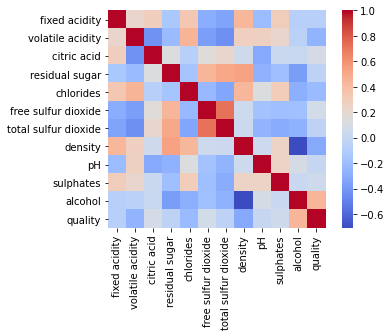

In [26]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

In [27]:
abs(corr_mat) > 0.4

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,True,False,False,False,False,False,False,True,False,False,False,False
volatile acidity,False,True,True,False,True,False,True,False,False,False,False,False
citric acid,False,True,True,False,False,False,False,False,False,False,False,False
residual sugar,False,False,False,True,False,True,True,True,False,False,False,False
chlorides,False,True,False,False,True,False,False,True,False,False,False,False
free sulfur dioxide,False,False,False,True,False,True,True,False,False,False,False,False
total sulfur dioxide,False,True,False,True,False,True,True,False,False,False,False,False
density,True,False,False,True,True,False,False,True,False,False,True,False
pH,False,False,False,False,False,False,False,False,True,False,False,False
sulphates,False,False,False,False,False,False,False,False,False,True,False,False


Как видим, сильных корреляций не очень много. Выделяется сильная отрицательная корреляция между содержанием алкоголя и
плотностью. Также видим сильную положительную корреляцию между свободным диоксидом серы и общим соделжанием диоксида серы.

# Обработка пропущенных значений

In [28]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         7
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [29]:
# Заполняем пропущенные значения медианой
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

In [30]:
data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [31]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000
mean,7.193319,0.335704,0.315594,5.418918,0.054347,30.356572,116.067304,0.994671,3.218869,0.526968,10.467870,5.822463
std,1.184304,0.155775,0.137598,4.590015,0.025694,16.554108,55.073220,0.002835,0.152715,0.132843,1.152919,0.857996
min,5.000000,0.115000,0.000000,0.800000,0.019000,3.000000,9.000000,0.988620,2.860000,0.280000,8.600000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,79.250000,0.992380,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,119.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,7.600000,0.400000,0.390000,8.100000,0.064000,41.000000,156.000000,0.996900,3.320000,0.600000,11.300000,6.000000
max,12.700000,0.965000,0.740000,19.400000,0.241000,86.000000,247.000000,1.001400,3.700000,1.120000,13.600000,9.000000


In [32]:
data.describe(include=['category'])

,type
count,6010
unique,2
top,white
freq,4576


# Обработка категориальных признаков 

У нас только один категориальный признак.
type - бинарный признак. Пусть 0 - white, 1 - red.

In [33]:
data['type'] = pd.factorize(data['type'])[0]

In [34]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,6
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Нормализация признаков

Проведем стандартизацию всех признаков

In [35]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03,6.010000e+03
mean,1.405620e-14,2.516209e-14,6.241084e-15,4.287500e-14,-1.748684e-15,-1.327262e-14,-9.842007e-16,2.749511e-16,1.094962e-12,-2.776359e-14,-1.686408e-14,-4.800843e-14,-6.506581e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.597517e-01,-1.851990e+00,-1.416809e+00,-2.293590e+00,-1.006297e+00,-1.375715e+00,-1.652555e+00,-1.944090e+00,-2.134025e+00,-2.349917e+00,-1.859093e+00,-1.620122e+00,-3.289599e+00
25%,-5.597517e-01,-6.698611e-01,-6.785659e-01,-4.767066e-01,-7.884327e-01,-6.362317e-01,-8.068434e-01,-6.685156e-01,-8.079460e-01,-7.128851e-01,-7.299447e-01,-8.394948e-01,-9.585856e-01
50%,-5.597517e-01,-1.632346e-01,-2.933958e-01,-4.065465e-02,-5.269957e-01,-2.859501e-01,-8.194778e-02,5.325084e-02,8.080936e-02,-5.807241e-02,-1.277322e-01,-1.456040e-01,2.069211e-01
75%,-5.597517e-01,3.433919e-01,4.127494e-01,5.407479e-01,5.841117e-01,3.756931e-01,6.429478e-01,7.250837e-01,7.861707e-01,6.622216e-01,5.497569e-01,7.217595e-01,2.069211e-01
max,1.786209e+00,4.649717e+00,4.039768e+00,3.084384e+00,3.045977e+00,7.264566e+00,3.361306e+00,2.377429e+00,2.373234e+00,3.150510e+00,4.464138e+00,2.716696e+00,3.703441e+00


# Разобьём данные на обучающую и тестовую выборки

In [36]:
X = data_stand.drop(['quality'], axis = 1)
y = data['quality']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.167, random_state = 18)
X_train.shape, X_test.shape

((5006, 12), (1004, 12))

# Запустим kNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

model7 = KNeighborsClassifier(n_neighbors=7)
model7.fit(X_train.values, y_train.values)

KNeighborsClassifier(n_neighbors=7)

In [39]:
model5 = KNeighborsClassifier(n_neighbors=5)
model5.fit(X_train.values, y_train.values)

KNeighborsClassifier()

In [40]:
model3 = KNeighborsClassifier(n_neighbors=3)
model3.fit(X_train.values, y_train.values)

KNeighborsClassifier(n_neighbors=3)

# Вычислим ошибки на обучающей и тестовой выборках

In [41]:
y_train_pred = model7.predict(X_train.values)
y_test_pred = model7.predict(X_test.values)

In [42]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.32820615261685976, 0.4262948207171315)

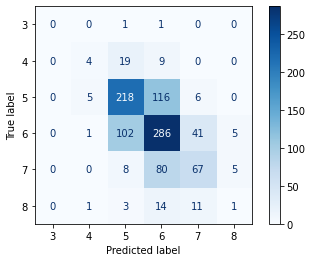

In [43]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model7, X_test.values, y_test.values, cmap=plt.cm.Blues)
pass

In [44]:
y_train_pred = model5.predict(X_train.values)
y_test_pred = model5.predict(X_test.values)

In [45]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.29424690371554135, 0.4203187250996016)

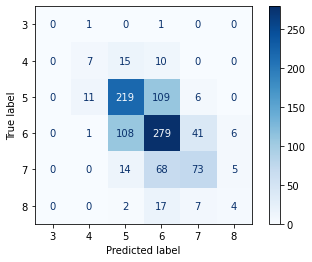

In [46]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model5, X_test.values, y_test.values, cmap=plt.cm.Blues)
pass

In [47]:
y_train_pred = model3.predict(X_train.values)
y_test_pred = model3.predict(X_test.values)

In [48]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.2147423092289253, 0.43725099601593626)

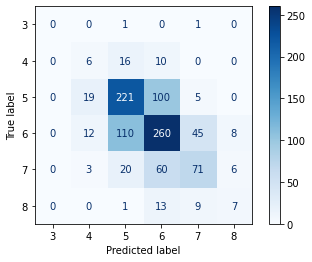

In [49]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model3, X_test.values, y_test.values, cmap=plt.cm.Blues)
pass

Как видим, все рассмотренные варианты выбора ближайших соседей показывают близкие результаты.

# Выводы

В ходе классификации вина по качеству, мы не добились высокой точности. Из полученных результатов можно сделать
вывод, что качество вина довольно субъективный показатель. Нельзя с высокой точностью определить качество, основываясь
лишь на физико-химические параметря. Можно предположить, что для улучшения точности классификации по качеству нам нужны
дополнительные данные, например сорт винограда, цена за бутылку и т.д..